In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from collections import Counter

In [2]:
file_path = 'Capsule_Hotel_Risk.csv'

data = pd.read_csv(file_path)

data.head()

,Unnamed: 0,content,translated_content,priority_score,problem_domain
0,1,"Sorry, including the expensive price + apk usi...","Sorry, including the expensive price + apk usi...",2,0
1,2,Setelah install terus pas buka aplikasi ngebla...,"After installed, the app stuck with white display",3,1
2,3,"gak bisa submit pada saat verifikasi data, pad...","Cannot submit the data verification, even my i...",3,1
3,4,Aplilasi restart mulu,The app keep restarting,3,1
4,5,"udah mahal , makanan ga enak, banyak lalat","Overpriced, bad food, too many flies",2,0


### EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          700 non-null    int64 
 1   content             700 non-null    object
 2   translated_content  700 non-null    object
 3   priority_score      700 non-null    int64 
 4   problem_domain      700 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 27.5+ KB


In [4]:
data.describe()

,Unnamed: 0,priority_score,problem_domain
count,700.00000,700.000000,700.000000
mean,350.50000,2.184286,0.185714
std,202.21688,0.757629,0.389154
min,1.00000,1.000000,0.000000
25%,175.75000,2.000000,0.000000
50%,350.50000,2.000000,0.000000
75%,525.25000,3.000000,0.000000
max,700.00000,3.000000,1.000000


In [5]:
data.isnull().count()

Unnamed: 0            700
content               700
translated_content    700
priority_score        700
problem_domain        700
dtype: int64

In [6]:
data['priority_score'].value_counts()

priority_score
3    277
2    275
1    148
Name: count, dtype: int64

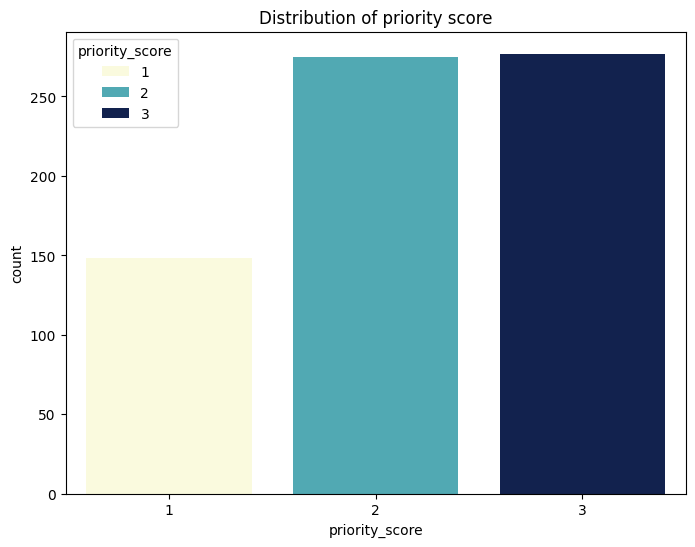

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['priority_score'], data=data, hue=data['priority_score'], palette='YlGnBu')
plt.title('Distribution of priority score')

plt.show()

In [8]:
data['problem_domain'].value_counts()

problem_domain
0    570
1    130
Name: count, dtype: int64

<ipython-input-9-46dcd120db6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['problem_domain'], data=data, palette='YlGnBu')


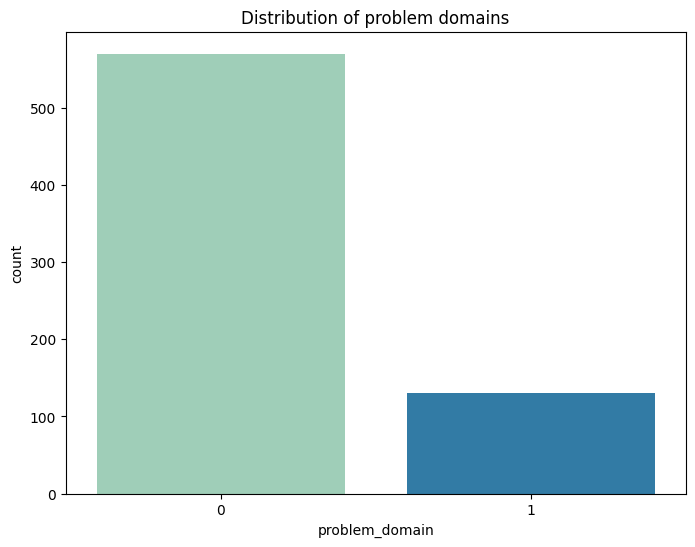

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['problem_domain'], data=data, palette='YlGnBu')
plt.title('Distribution of problem domains')
plt.show()

In [10]:
text = ' '.join(review for review in data['translated_content'])

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

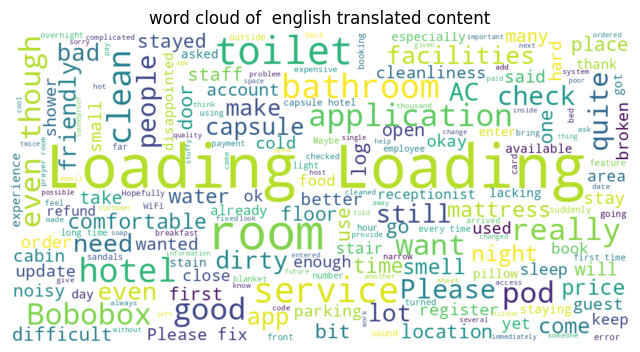

In [11]:
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('word cloud of  english translated content')

plt.show()

In [12]:
data['content_length'] = data['translated_content'].apply(len)

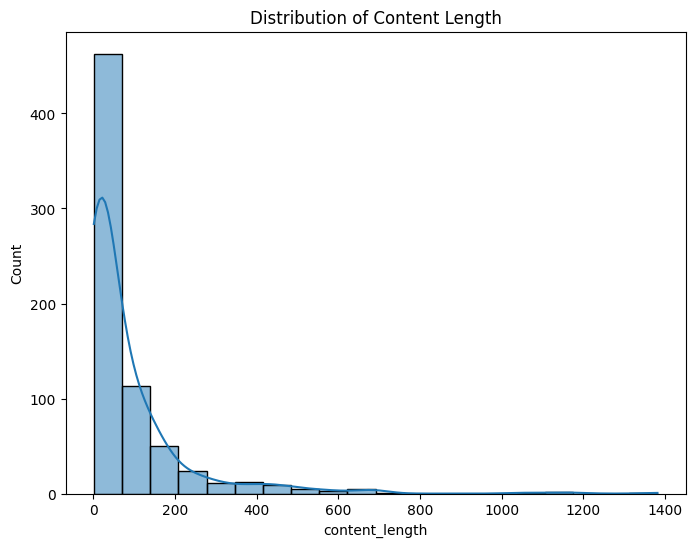

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data['content_length'], bins=20, kde=True)
plt.title('Distribution of Content Length')
plt.show()

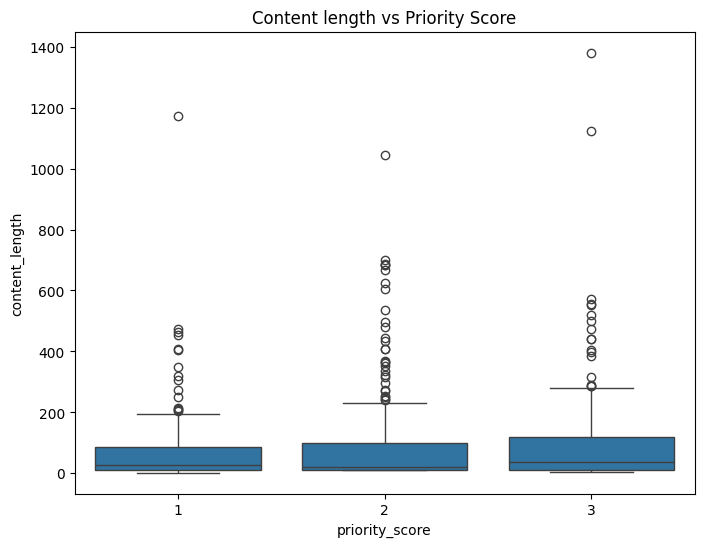

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['priority_score'], y=data['content_length'])
plt.title('Content length vs Priority Score')

plt.show()

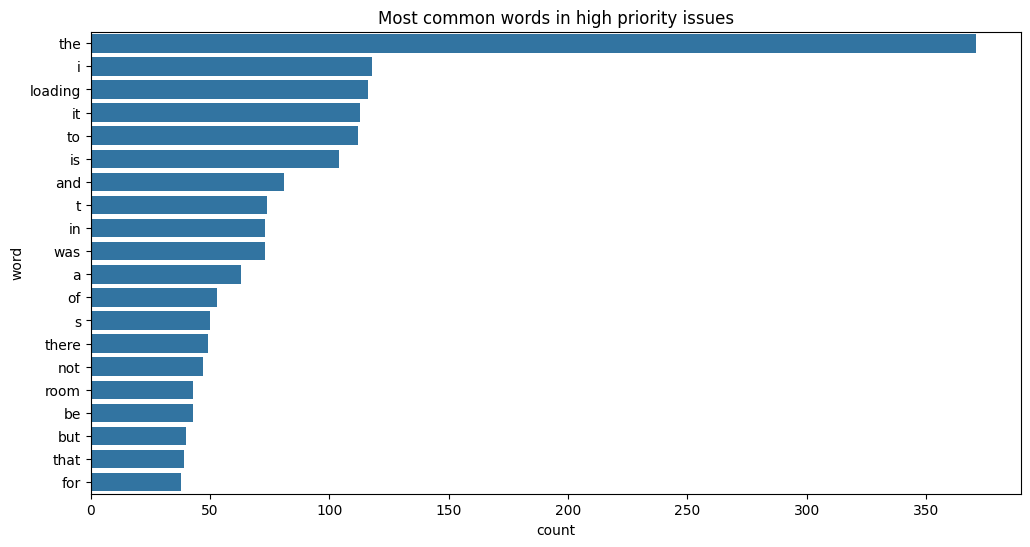

In [15]:
high_priority = data[data['priority_score'] == 3]

high_priority_text = ' '.join(review for review in high_priority.translated_content)

words = re.findall(r'\w+', high_priority_text.lower())
common_words = Counter(words).most_common(20)

common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('Most common words in high priority issues')
plt.show()

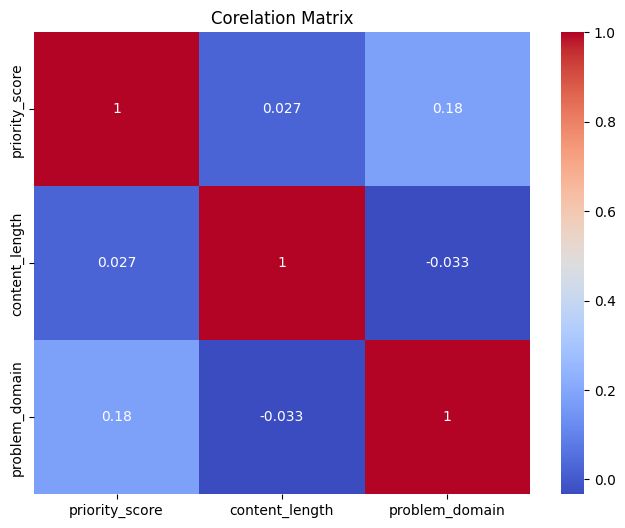

In [16]:
correlation_matrix = data[['priority_score', 'content_length', 'problem_domain']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Corelation Matrix')

plt.show()

### Sentiment Analysis


In [17]:
X = data['translated_content']
y = data['priority_score'].apply(lambda x: 'high' if x == 3 else 'low')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((560,), (140,), (560,), (140,))

In [18]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train.shape, X_test.shape

((560,), (140,))

In [19]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test_tfidf)

y_pred

array(['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'high',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'high', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'low

In [21]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()

df_report

,precision,recall,f1-score,support
high,0.666667,0.096774,0.169014,62.000000
low,0.572519,0.961538,0.717703,78.000000
accuracy,0.578571,0.578571,0.578571,0.578571
macro avg,0.619593,0.529156,0.443359,140.000000
weighted avg,0.614213,0.578571,0.474712,140.000000


In [22]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [23]:
y_pred = model.predict(X_test_tfidf)

y_pred

array(['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'high', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'lo

In [24]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()

df_report

,precision,recall,f1-score,support
high,0.666667,0.032258,0.061538,62.000000
low,0.562044,0.987179,0.716279,78.000000
accuracy,0.564286,0.564286,0.564286,0.564286
macro avg,0.614355,0.509719,0.388909,140.000000
weighted avg,0.608377,0.564286,0.426323,140.000000


In [25]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [26]:
y_pred = model.predict(X_test_tfidf)

y_pred

array(['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'high', 'low', 'high', 'high',
       'low', 'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'high', 'low', 'high', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'high', 'low', 'high', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'high',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'high', 'low', 'high', 'low', 'low', 'low', 'low', 'high', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'high', 'high', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', '

In [27]:
report = classification_report(y_test, y_pred,output_dict=True)

df_report = pd.DataFrame(report).transpose()

df_report

,precision,recall,f1-score,support
high,0.500000,0.241935,0.326087,62.000000
low,0.572727,0.807692,0.670213,78.000000
accuracy,0.557143,0.557143,0.557143,0.557143
macro avg,0.536364,0.524814,0.498150,140.000000
weighted avg,0.540519,0.557143,0.517814,140.000000


In [28]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [29]:
y_pred = model.predict(X_test_tfidf)

y_pred

array(['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'high', 'high',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'high', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'high', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       

In [30]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()

df_report

,precision,recall,f1-score,support
high,0.692308,0.145161,0.240000,62.000000
low,0.582677,0.948718,0.721951,78.000000
accuracy,0.592857,0.592857,0.592857,0.592857
macro avg,0.637492,0.546940,0.480976,140.000000
weighted avg,0.631228,0.592857,0.508516,140.000000


### Sentiment Analysis Part 2

Changing labels to problem_domain

In [31]:
data.head()

,Unnamed: 0,content,translated_content,priority_score,problem_domain,content_length
0,1,"Sorry, including the expensive price + apk usi...","Sorry, including the expensive price + apk usi...",2,0,118
1,2,Setelah install terus pas buka aplikasi ngebla...,"After installed, the app stuck with white display",3,1,49
2,3,"gak bisa submit pada saat verifikasi data, pad...","Cannot submit the data verification, even my i...",3,1,70
3,4,Aplilasi restart mulu,The app keep restarting,3,1,23
4,5,"udah mahal , makanan ga enak, banyak lalat","Overpriced, bad food, too many flies",2,0,36


In [32]:
X = data['translated_content']
y = data['problem_domain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((560,), (140,), (560,), (140,))

In [33]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

((560, 1505), (140, 1505))

In [34]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test_tfidf)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()

df_report

,precision,recall,f1-score,support
0,0.835821,1.000000,0.910569,112.000000
1,1.000000,0.214286,0.352941,28.000000
accuracy,0.842857,0.842857,0.842857,0.842857
macro avg,0.917910,0.607143,0.631755,140.000000
weighted avg,0.868657,0.842857,0.799044,140.000000


In [37]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [38]:
y_pred = model.predict(X_test_tfidf)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df

,precision,recall,f1-score,support
0,0.805755,1.000000,0.892430,112.000000
1,1.000000,0.035714,0.068966,28.000000
accuracy,0.807143,0.807143,0.807143,0.807143
macro avg,0.902878,0.517857,0.480698,140.000000
weighted avg,0.844604,0.807143,0.727737,140.000000


In [40]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [41]:
y_pred = model.predict(X_test_tfidf)

y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1])

In [42]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df

,precision,recall,f1-score,support
0,0.894309,0.982143,0.936170,112.000000
1,0.882353,0.535714,0.666667,28.000000
accuracy,0.892857,0.892857,0.892857,0.892857
macro avg,0.888331,0.758929,0.801418,140.000000
weighted avg,0.891918,0.892857,0.882270,140.000000


In [43]:
vectorizer = TfidfVectorizer()
X_train_tdif = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [44]:
y_pred = model.predict(X_test_tfidf)

y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df

,precision,recall,f1-score,support
0,0.875000,1.000000,0.933333,112.000000
1,1.000000,0.428571,0.600000,28.000000
accuracy,0.885714,0.885714,0.885714,0.885714
macro avg,0.937500,0.714286,0.766667,140.000000
weighted avg,0.900000,0.885714,0.866667,140.000000
